## Bike Sharing Demand
<br>
Forecast use of a city bikeshare system

Data Fields

<br>

datetime - hourly date + timestamp  <br>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
holiday - whether the day is considered a holiday <br>
workingday - whether the day is neither a weekend nor holiday <br>
weather 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius<br>
atemp - "feels like" temperature in Celsius<br>
humidity - relative humidity<br>
windspeed - wind speed<br>
casual - number of non-registered user rentals initiated<br>
registered - number of registered user rentals initiated<br>
count - number of total rentals<br>

Evaluation
<br>
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
# plt.rc("figure", figsize=(12,10))

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_val_predict

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.svm import SVC

### Collection CSV file

In [235]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sub = pd.read_csv('./data/sampleSubmission.csv')

print(train.shape, test.shape)
print(train.info(), test.info())
print(train.isnull().sum(), test.isnull().sum())

(10886, 12) (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 

In [236]:
sub

datetime  count
0     2011-01-20 00:00:00      0
1     2011-01-20 01:00:00      0
2     2011-01-20 02:00:00      0
3     2011-01-20 03:00:00      0
4     2011-01-20 04:00:00      0
5     2011-01-20 05:00:00      0
6     2011-01-20 06:00:00      0
7     2011-01-20 07:00:00      0
8     2011-01-20 08:00:00      0
9     2011-01-20 09:00:00      0
10    2011-01-20 10:00:00      0
11    2011-01-20 11:00:00      0
12    2011-01-20 12:00:00      0
13    2011-01-20 13:00:00      0
14    2011-01-20 14:00:00      0
15    2011-01-20 15:00:00      0
16    2011-01-20 16:00:00      0
17    2011-01-20 17:00:00      0
18    2011-01-20 18:00:00      0
19    2011-01-20 19:00:00      0
20    2011-01-20 20:00:00      0
21    2011-01-20 21:00:00      0
22    2011-01-20 22:00:00      0
23    2011-01-20 23:00:00      0
24    2011-01-21 00:00:00      0
25    2011-01-21 01:00:00      0
26    2011-01-21 02:00:00      0
27    2011-01-21 03:00:00      0
28    2011-01-21 04:00:00      0
29    2011-01-21 05:00:00      0
30    2011-01-21 06:00:00      0
31    2011-01-21 07:00:00      0
32    2011-01-21 08:00:00      0
33    2011-01-21 09:00:00      0
34    2011-01-21 10:00:00      0
35    2011-01-21 11:00:00      0
36    2011-01-21 12:00:00      0
37    2011-01-21 13:00:00      0
38    2011-01-21 14:00:00      0
39    2011-01-21 15:00:00      0
40    2011-01-21 16:00:00      0
41    2011-01-21 17:00:00      0
42    2011-01-21 18:00:00      0
43    2011-01-21 19:00:00      0
44    2011-01-21 20:00:00      0
45    2011-01-21 21:00:00      0
46    2011-01-21 22:00:00      0
47    2011-01-21 23:00:00      0
48    2011-01-22 00:00:00      0
49    2011-01-22 01:00:00      0
50    2011-01-22 02:00:00      0
51    2011-01-22 03:00:00      0
52    2011-01-22 04:00:00      0
53    2011-01-22 06:00:00      0
54    2011-01-22 07:00:00      0
55    2011-01-22 08:00:00      0
56    2011-01-22 09:00:00      0
57    2011-01-22 10:00:00      0
58    2011-01-22 11:00:00      0
59    2011-01-22 12:00:00      0
60    2011-01-22 13:00:00      0
61    2011-01-22 14:00:00      0
62    2011-01-22 15:00:00      0
63    2011-01-22 16:00:00      0
64    2011-01-22 17:00:00      0
65    2011-01-22 18:00:00      0
66    2011-01-22 19:00:00      0
67    2011-01-22 20:00:00      0
68    2011-01-22 21:00:00      0
69    2011-01-22 22:00:00      0
70    2011-01-22 23:00:00      0
71    2011-01-23 00:00:00      0
72    2011-01-23 01:00:00      0
73    2011-01-23 02:00:00      0
74    2011-01-23 03:00:00      0
75    2011-01-23 05:00:00      0
76    2011-01-23 06:00:00      0
77    2011-01-23 07:00:00      0
78    2011-01-23 08:00:00      0
79    2011-01-23 09:00:00      0
80    2011-01-23 10:00:00      0
81    2011-01-23 11:00:00      0
82    2011-01-23 12:00:00      0
83    2011-01-23 13:00:00      0
84    2011-01-23 14:00:00      0
85    2011-01-23 15:00:00      0
86    2011-01-23 16:00:00      0
87    2011-01-23 17:00:00      0
88    2011-01-23 18:00:00      0
89    2011-01-23 19:00:00      0
90    2011-01-23 20:00:00      0
91    2011-01-23 21:00:00      0
92    2011-01-23 22:00:00      0
93    2011-01-23 23:00:00      0
94    2011-01-24 00:00:00      0
95    2011-01-24 01:00:00      0
96    2011-01-24 03:00:00      0
97    2011-01-24 04:00:00      0
98    2011-01-24 05:00:00      0
99    2011-01-24 06:00:00      0
100   2011-01-24 07:00:00      0
101   2011-01-24 08:00:00      0
102   2011-01-24 09:00:00      0
103   2011-01-24 10:00:00      0
104   2011-01-24 11:00:00      0
105   2011-01-24 12:00:00      0
106   2011-01-24 13:00:00      0
107   2011-01-24 14:00:00      0
108   2011-01-24 15:00:00      0
109   2011-01-24 16:00:00      0
110   2011-01-24 17:00:00      0
111   2011-01-24 18:00:00      0
112   2011-01-24 19:00:00      0
113   2011-01-24 20:00:00      0
114   2011-01-24 21:00:00      0
115   2011-01-24 22:00:00      0
116   2011-01-24 23:00:00      0
117   2011-01-25 00:00:00      0
118   2011-01-25 01:00:00      0
119   2011-01-25 02:00:00      0
120   2011-01-25 04:00:0

### EDA & Feature Enginnering

In [237]:
dataset = [train, test]

<AxesSubplot:>

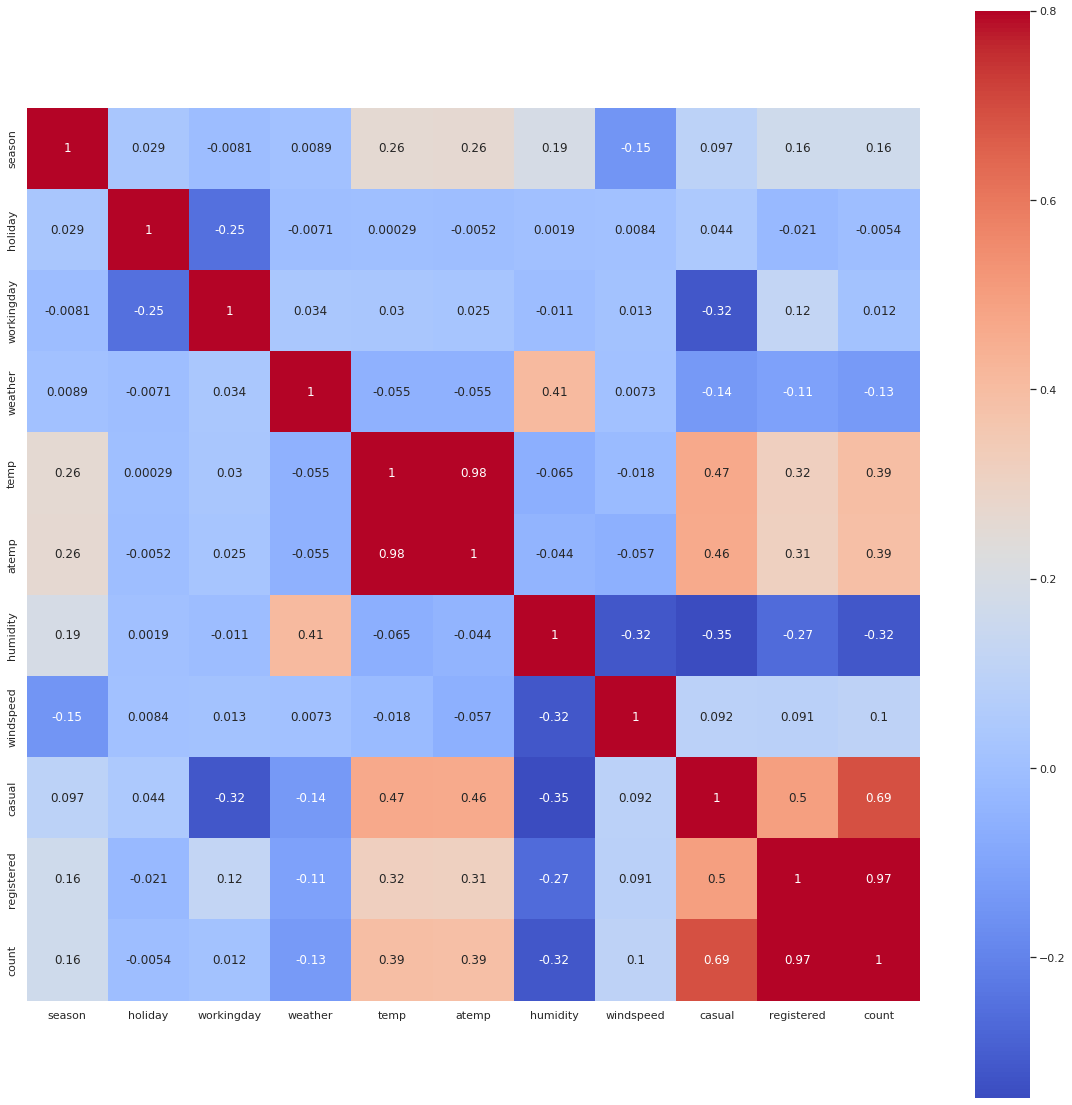

In [238]:
cols = list(train.columns)
corr = train[cols].corr()
mask = np.array(corr)

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, square=True, annot=True, cmap="coolwarm")

##### Datetime & Season

In [239]:
for data in dataset:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['year'] = data['datetime'].dt.year
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['minute'] = data['datetime'].dt.minute
    data['second'] = data['datetime'].dt.second

In [240]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  minute  second  
0        1     0       0       0  
1        1     1       0       0  
2        1     2       0       0  
3        1     3       0       0  
4        1     4       0       0  
...    ...   ...     ...     ...  
10881   19    19       0       0  
10882   19    20       0       0  
10883   19    21       0       0  
10884   19    22       0       0  
10885   19    23       0       0  

[10886 rows x 18 columns]

<AxesSubplot:xlabel='second', ylabel='count'>

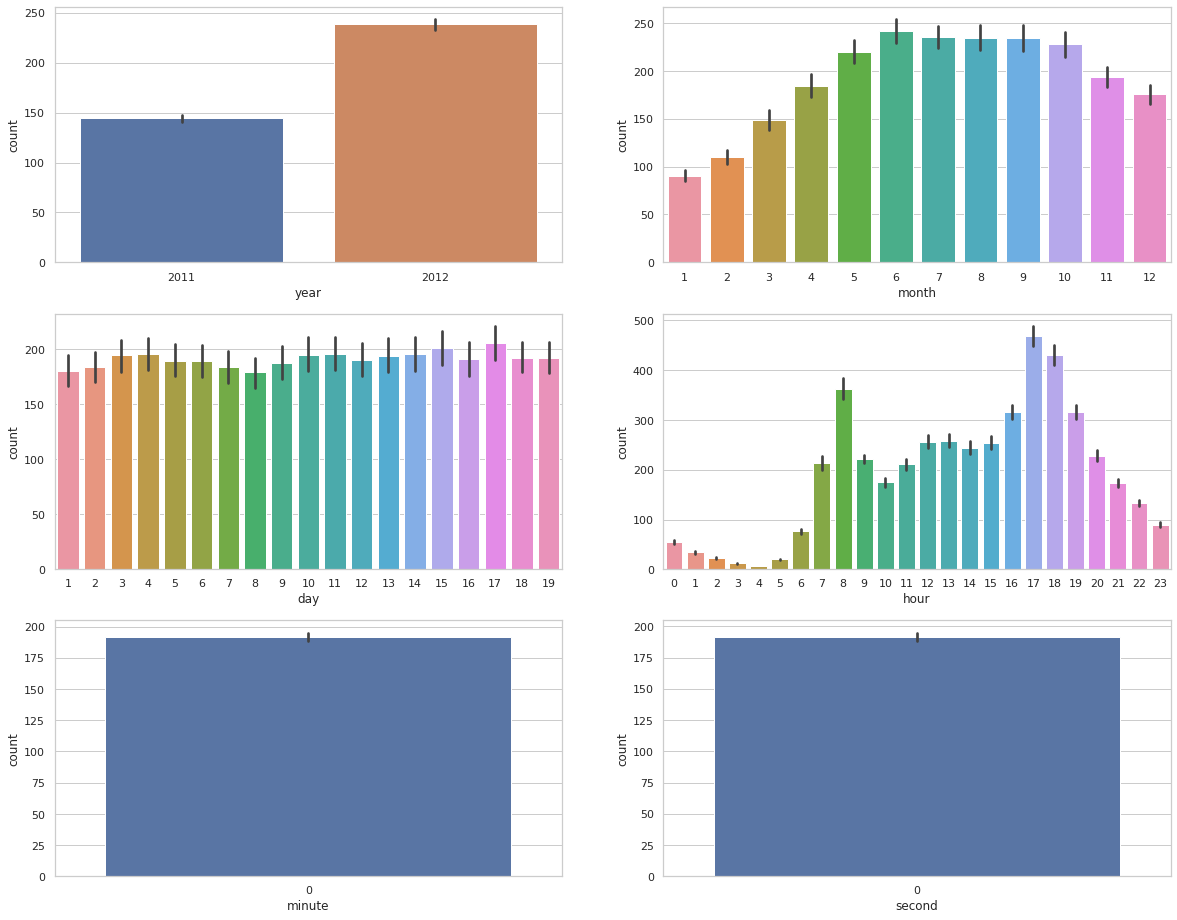

In [241]:
figure, ((ax1, ax2),(ax3,ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,16))

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

In [242]:
for data in dataset:
    data.drop(columns=['day', 'minute', 'second'], axis=1, inplace=True)

In [243]:
for data in dataset:
    data['year_season'] = data['year'].astype('str') + data['season'].astype('str')
    data['year_month'] = data['year'].astype('str') + data['month'].astype('str')

<AxesSubplot:xlabel='year_season', ylabel='count'>

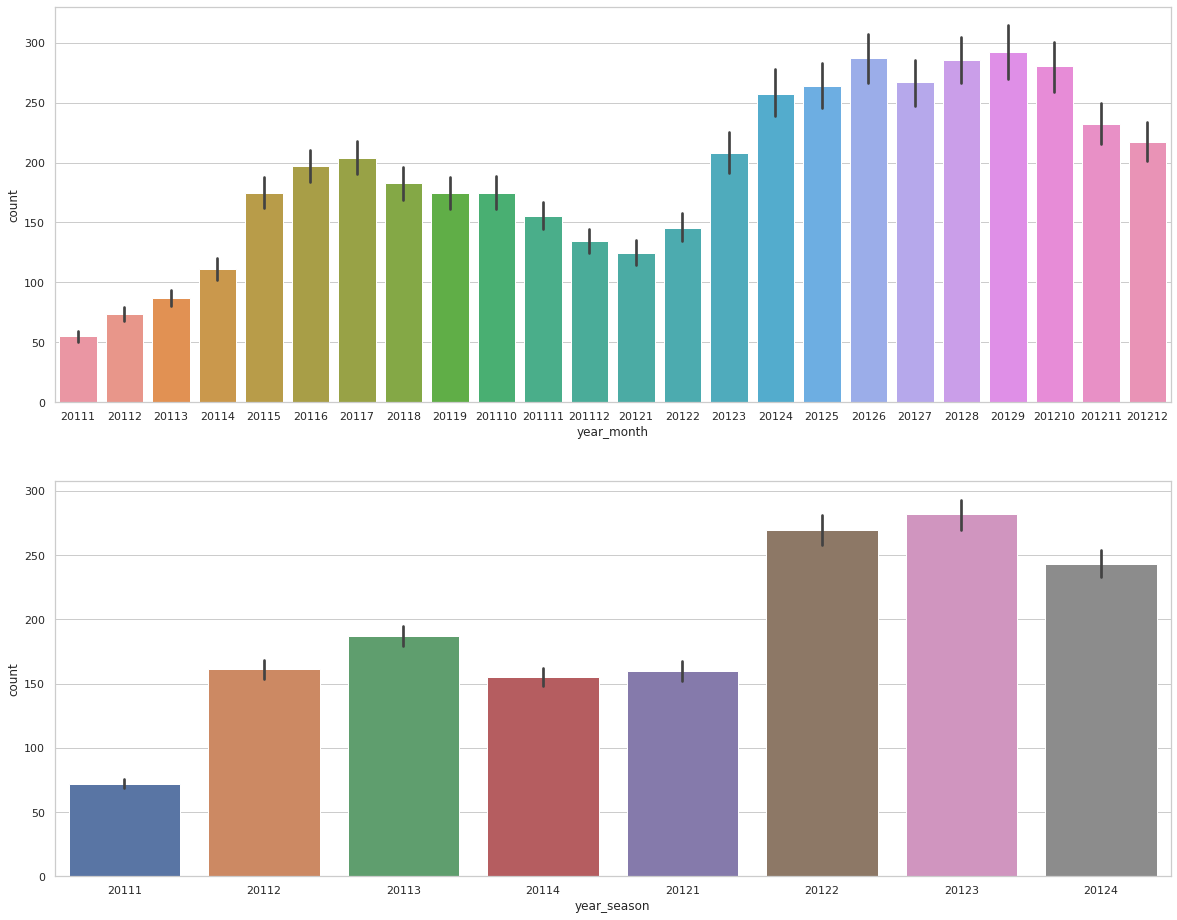

In [244]:
figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(20,16))

sns.barplot(data=train, x='year_month', y='count', ax=ax1)
sns.barplot(data=train, x='year_season', y='count', ax=ax2)

In [245]:
dummies = pd.get_dummies(train['year_season'], prefix='year_season')
train = pd.concat([train, dummies], axis=1)

dummies = pd.get_dummies(test['year_season'], prefix='year_season')
test = pd.concat([test, dummies], axis=1)

In [246]:
train.drop(columns=['year', 'month', 'year_month', 'season', 'year_season'], axis=1, inplace=True)

In [247]:
test.drop(columns=['year', 'month', 'year_month', 'season', 'year_season'], axis=1, inplace=True)

In [248]:
train['datetime'].dt.day_name()
train['day_int'] = train['datetime'].dt.dayofweek

test['datetime'].dt.day_name()
test['day_int'] = test['datetime'].dt.dayofweek

<AxesSubplot:xlabel='hour', ylabel='count'>

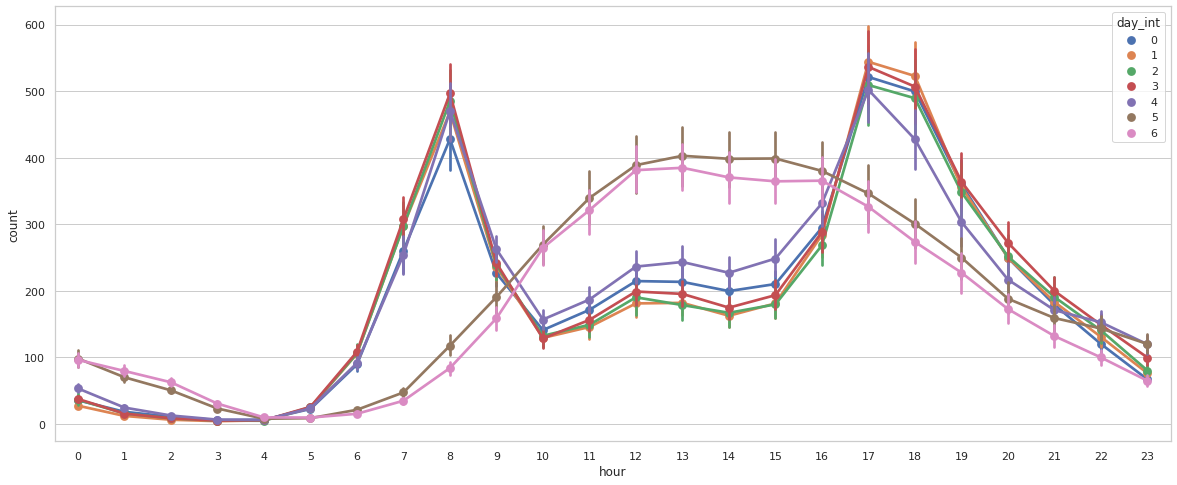

In [249]:
plt.figure(figsize=(20,8))
sns.pointplot(data=train, x='hour', y='count', hue='day_int')

##### holiday & working day

In [250]:
c1 = train['holiday'] == 0 
c2 = train['workingday'] == 0 

train['weekend'] = c1 & c2

In [251]:
c1 = test['holiday'] == 0 
c2 = test['workingday'] == 0 

test['weekend'] = c1 & c2

<AxesSubplot:xlabel='hour', ylabel='count'>

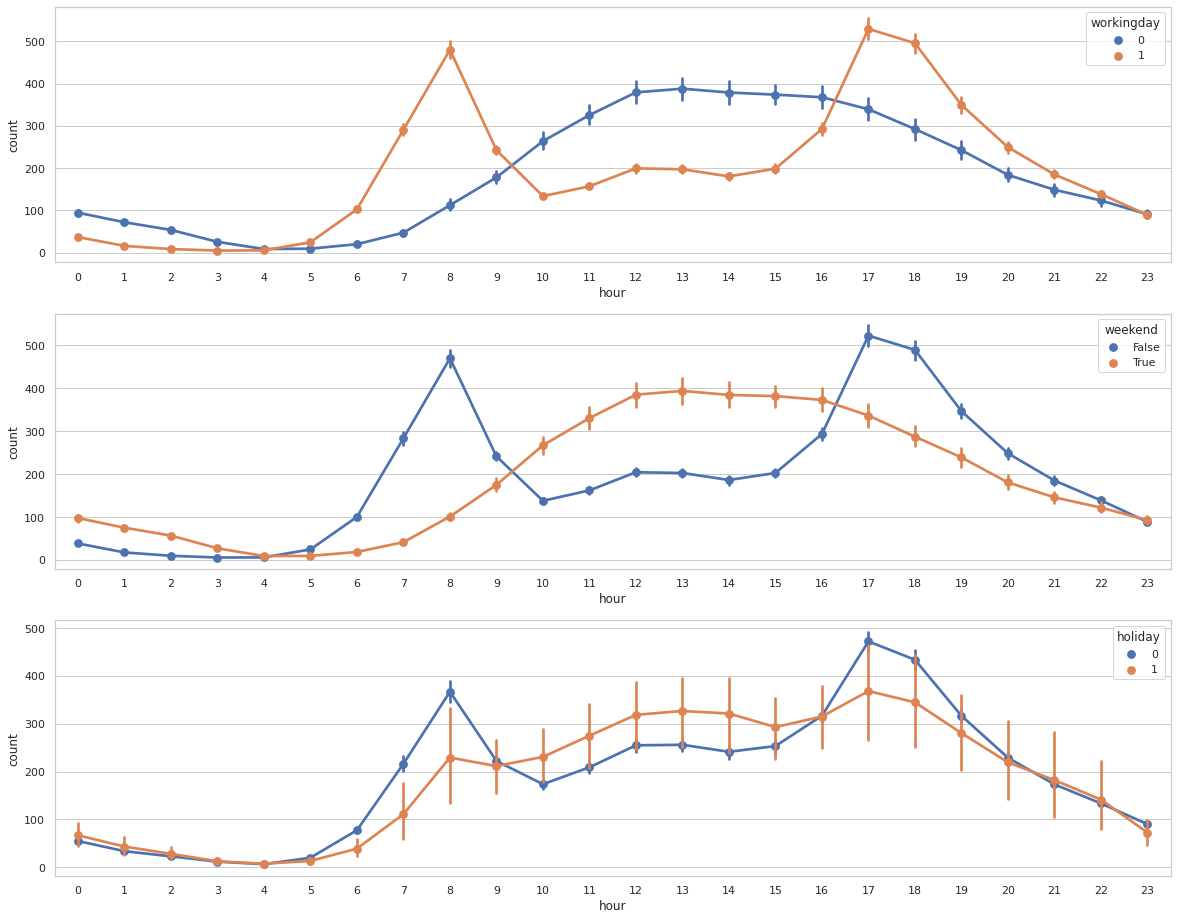

In [252]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(20,16))

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='weekend', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=ax3)

#####  Weather

In [253]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [254]:
test['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

In [255]:
train.loc[train['weather'] == 4, 'weather'] = 3

In [256]:
test.loc[test['weather'] == 4, 'weather'] = 3

<AxesSubplot:xlabel='weather', ylabel='count'>

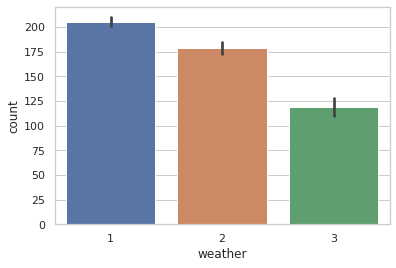

In [257]:
sns.barplot(data=train, x='weather', y='count')

##### temp & atemp

<AxesSubplot:xlabel='atemp', ylabel='count'>

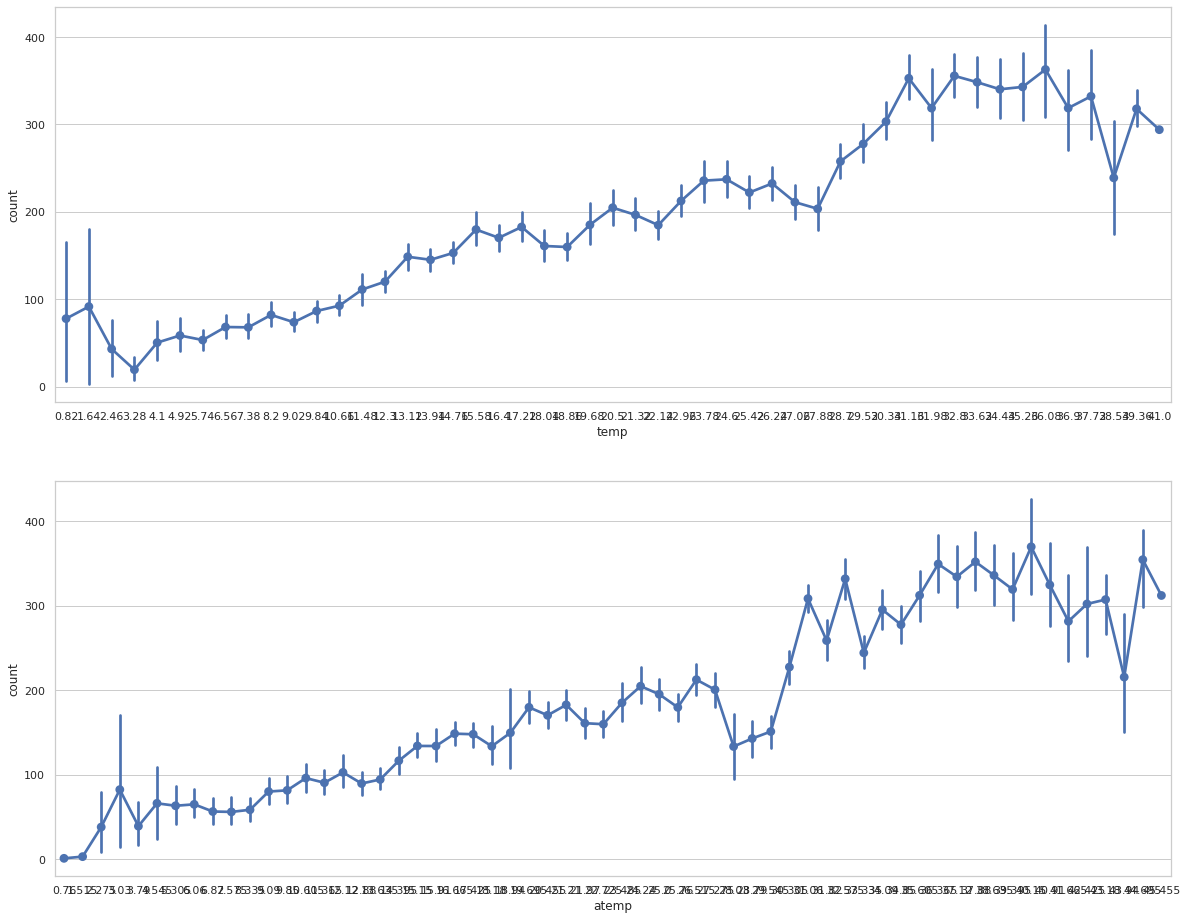

In [258]:
figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(20,16))

sns.pointplot(data=train, x='temp', y='count', ax=ax1)
sns.pointplot(data=train, x='atemp', y='count', ax=ax2)

<AxesSubplot:xlabel='temp_int', ylabel='count'>

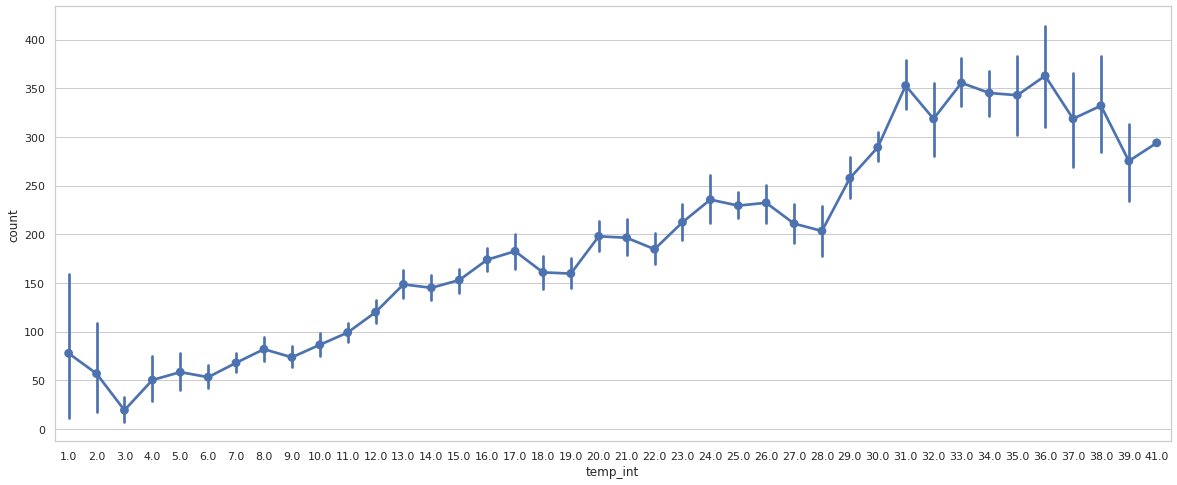

In [259]:
plt.figure(figsize=(20,8))
train['temp_int'] = train['temp'].round()
test['temp_int'] = test['temp'].round()
sns.pointplot(data=train, x='temp_int', y='count')

In [260]:
train['temp_low'] = train['temp_int'] < 12
train['temp_middle'] = (train['temp_int'] >= 12) & (train['temp_int'] < 23)
train['temp_calm'] = (train['temp_int'] >= 23) & (train['temp_int'] < 31)
train['temp_hot'] = (train['temp_int'] >= 31)

In [261]:
test['temp_low'] = test['temp_int'] < 12
test['temp_middle'] = (test['temp_int'] >= 12) & (test['temp_int'] < 23)
test['temp_calm'] = (test['temp_int'] >= 23) & (test['temp_int'] < 31)
test['temp_hot'] = (test['temp_int'] >= 31)

##### humidity

<AxesSubplot:xlabel='humidity', ylabel='count'>

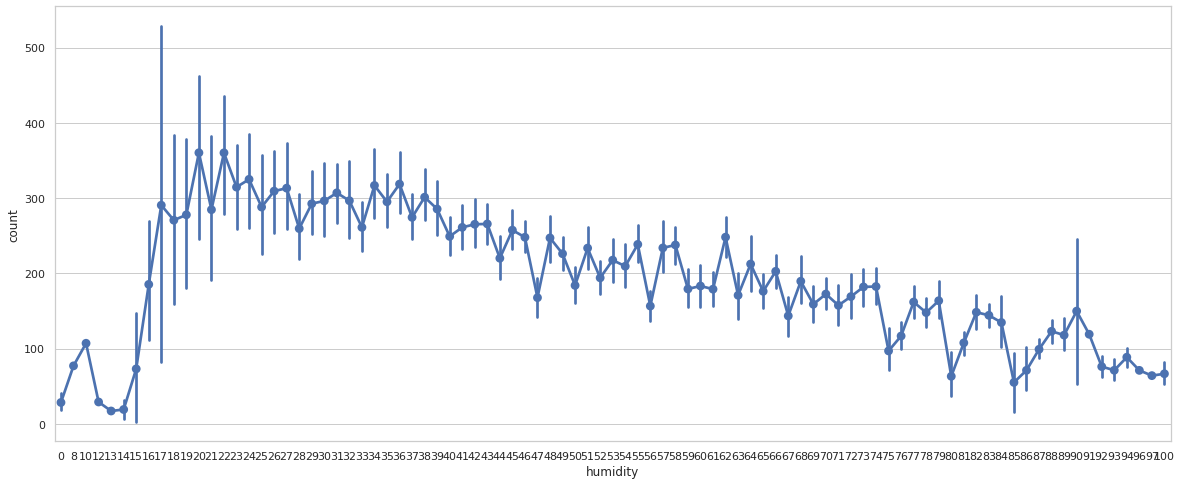

In [262]:
plt.figure(figsize=(20,8))
sns.pointplot(data=train, x='humidity', y='count')

In [263]:
pd.set_option('display.max_rows', 10000)
train.groupby('humidity')['count'].mean().head(100)

humidity
0       28.318182
8       77.000000
10     107.000000
12      29.000000
13      17.000000
14      19.000000
15      73.000000
16     185.250000
17     290.500000
18     270.571429
19     277.733333
20     360.200000
21     284.562500
22     360.111111
23     314.540541
24     324.891892
25     288.062500
26     309.230769
27     313.163265
28     259.426230
29     292.492308
30     296.266667
31     306.912500
32     296.500000
33     261.057692
34     316.741935
35     295.056075
36     318.581395
37     274.348993
38     301.133858
39     285.444444
40     249.041916
41     261.048913
42     265.150376
43     265.632124
44     220.013245
45     257.377622
46     247.898785
47     167.630137
48     247.038760
49     226.038462
50     183.878947
51     233.496894
52     193.986239
53     217.510753
54     209.384146
55     238.433036
56     156.485577
57     233.758621
58     237.672619
59     179.179775
60     183.135802
61     178.926829
62     248.034653
63     170.778846
6

In [264]:
train['humidity_low'] = (train['humidity'] < 17)
train['humidity_middle'] = (train['humidity'] >= 17) & (train['humidity'] < 67)
train['humidity_high'] = (train['humidity'] >= 67)

In [265]:
test['humidity_low'] = (test['humidity'] < 17)
test['humidity_middle'] = (test['humidity'] >= 17) & (test['humidity'] < 67)
test['humidity_high'] = (test['humidity'] >= 67)

##### Windspeed

In [266]:
train['windspeed']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

<AxesSubplot:xlabel='windspeed', ylabel='count'>

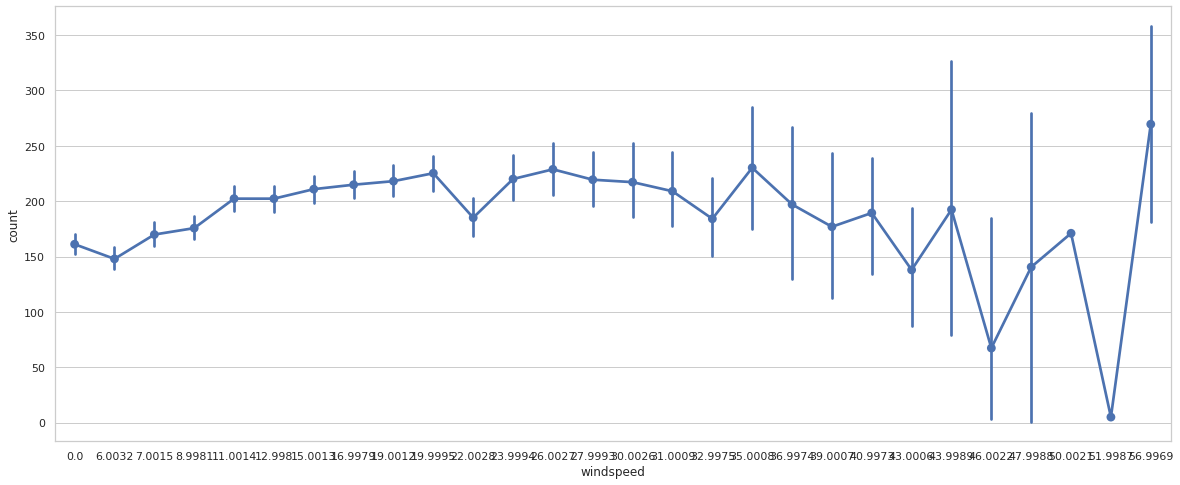

In [267]:
plt.figure(figsize=(20,8))
sns.pointplot(data=train, x='windspeed', y='count')

/home/chahohyun/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

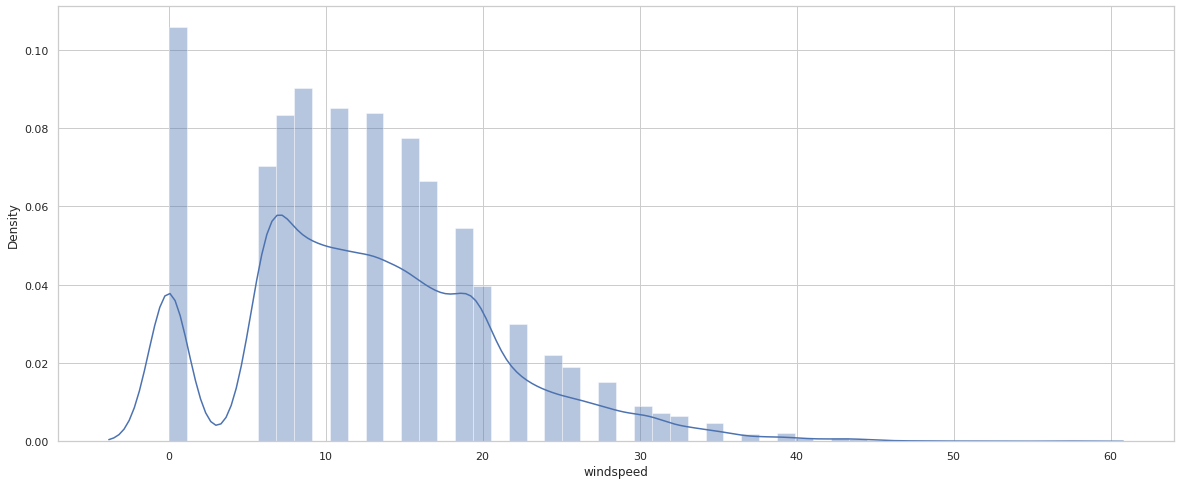

In [268]:
plt.figure(figsize=(20,8))
sns.distplot(train['windspeed'])

### ML Modeling

##### Log Transform

In [289]:
feature = ['holiday', 'workingday', 'weather', 'hour', 'day_int',
           'year_season_20111', 'year_season_20112','year_season_20113', 
           'year_season_20114', 'year_season_20121','year_season_20122', 
           'year_season_20123', 'year_season_20124', 'weekend', 
           'atemp', 'humidity'] # 'windspeed', 'humidity_low,_middle,_high', 'temp_low, _middle, _calm, _hot'

In [290]:
x_train = train[feature]

y_train_casual = train['casual']
y_train_registered = train['registered']
y_train_count = train['count']

x_test = test[feature]

In [291]:
y_train_casual_log = np.log(y_train_casual+1)
y_train_registered_log = np.log(y_train_registered+1)
y_train_count_log = np.log(y_train_count+1)

In [292]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_squared_log_error

# model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

# kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# y_pred_casual_log = cross_val_predict(model, x_train, y_train_casual_log, cv=kfold, n_jobs=-1)
# y_pred_registered_log = cross_val_predict(model, x_train, y_train_registered_log, cv=kfold, n_jobs=-1)
# y_pred_count_log = cross_val_predict(model, x_train, y_train_count_log, cv=kfold, n_jobs=-1)

# y_pred_casual = np.exp(y_pred_casual_log) - 1
# y_pred_registered = np.exp(y_pred_registered_log) - 1
# y_pred_count = np.exp(y_pred_count_log) - 1

# y_pred = np.sqrt((y_pred_casual + y_pred_registered)*y_pred_count)

# score = mean_squared_log_error(y_pred, y_train_count)
# score = np.sqrt(score)

# print("Score= {0:.5f}".format(score))

In [293]:
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
model.fit(x_train, y_train_casual_log)
y_pred_casual_log = model.predict(x_test)
y_pred_casual = np.exp(y_pred_casual_log) - 1
y_pred_casual.shape

(6493,)

In [294]:
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
model.fit(x_train, y_train_registered_log)
y_pred_registered_log = model.predict(x_test)
y_pred_registered = np.exp(y_pred_registered_log) - 1
y_pred_registered.shape

(6493,)

In [295]:
y_pred = y_pred_casual + y_pred_registered
y_pred

array([ 11.64152644,   5.53058289,   2.79667414, ..., 103.89474185,
        96.98954167,  45.88187912])

In [296]:
sub['count'] = y_pred
sub.head(10)

datetime       count
0  2011-01-20 00:00:00   11.641526
1  2011-01-20 01:00:00    5.530583
2  2011-01-20 02:00:00    2.796674
3  2011-01-20 03:00:00    2.859469
4  2011-01-20 04:00:00    1.985919
5  2011-01-20 05:00:00    4.841105
6  2011-01-20 06:00:00   39.905338
7  2011-01-20 07:00:00   98.407924
8  2011-01-20 08:00:00  228.553642
9  2011-01-20 09:00:00  129.302829

In [297]:
sub.to_csv('./data/Submission_prac.csv', index=False)

In [298]:
submission = pd.read_csv('./data/Submission_prac.csv')
submission.head()

datetime      count
0  2011-01-20 00:00:00  11.641526
1  2011-01-20 01:00:00   5.530583
2  2011-01-20 02:00:00   2.796674
3  2011-01-20 03:00:00   2.859469
4  2011-01-20 04:00:00   1.985919